### Import Necessary Libraries

In [535]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn import tree


from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV


%matplotlib inline 
# will open a new window and display the graphics

### Load Dataset

In [461]:
wine = pd.read_csv(r"C:\Users\wiroo\Documents\Projects\Data Science\Wine\winequality_red.csv")

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [462]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [463]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Preprocess Data

In [464]:
bins = (2, 6.5, 8) # 2 bins of quality with spread of 6.5
group_names = ["Bad", "Good"]
wine["quality"] = pd.cut(wine["quality"], bins = bins, labels = group_names)

wine["quality"].unique()

[Bad, Good]
Categories (2, object): [Bad < Good]

In [465]:
label_quality = LabelEncoder() # Change it to numerical numbers

wine["quality"] = label_quality.fit_transform(wine["quality"])

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [466]:
wine["quality"].value_counts()

0    1382
1     217
Name: quality, dtype: int64

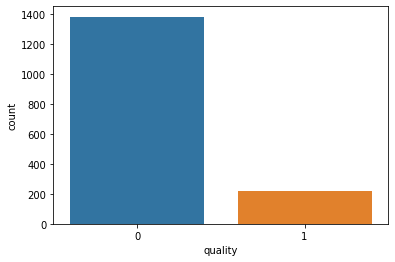

In [467]:
sns.countplot(wine["quality"])

#### Seperate the Dataset as reponse variable and feature variables

In [562]:
X = wine.drop("quality", axis = 1)
y = wine["quality"]

### Train and Test Splitting of Data

In [538]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Apply Standard Scaling to get optimized result

In [549]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  1.09349989,
         0.45822284,  1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.07566946,
         0.51551749, -0.58738978],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  1.28836145,
        -0.68767023, -0.87248428],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.50891521,
        -0.68767023,  2.92877575]])

### Random Forest Classifier

In [550]:
rfc = RandomForestClassifier(n_estimators = 200, max_depth = 3)

rfc.fit(X_train, y_train)

pred_rfc = rfc.predict(X_test)

#### Visualize Random Forest 

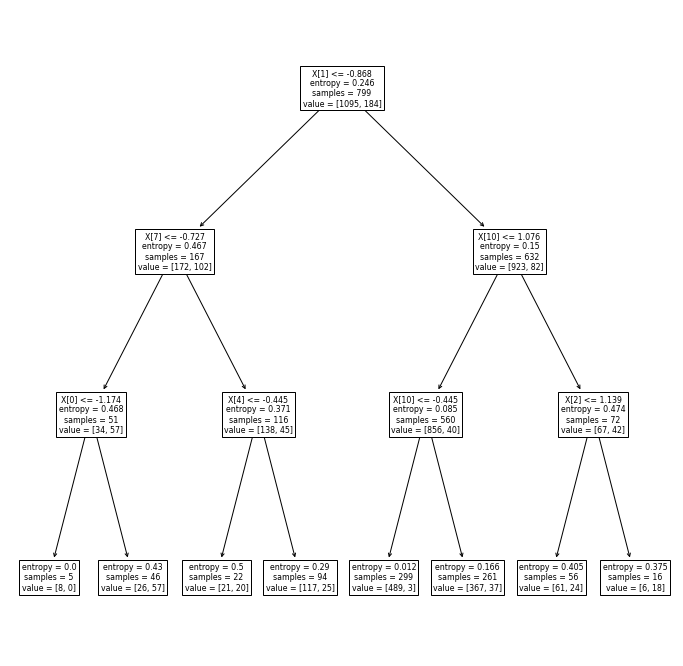

In [551]:
#from sklearn import tree

plt.figure(figsize = (12,12))
tree.plot_tree(rfc.estimators_[199], fontsize = 15)

tree.plot_tree(rfc.estimators_[199])

plt.show()

#### Model Performance

In [552]:
print(classification_report(y_test, pred_rfc))

cm_rfc = confusion_matrix(y_test, pred_rfc)

print(cm_rfc)


              precision    recall  f1-score   support

           0       0.87      1.00      0.93       273
           1       0.86      0.13      0.22        47

    accuracy                           0.87       320
   macro avg       0.86      0.56      0.58       320
weighted avg       0.87      0.87      0.82       320

[[272   1]
 [ 41   6]]


#### Visualize Confusion Matrix

[Text(0, 0.5, 'Bad Quality'), Text(0, 1.5, 'Good Quality')]

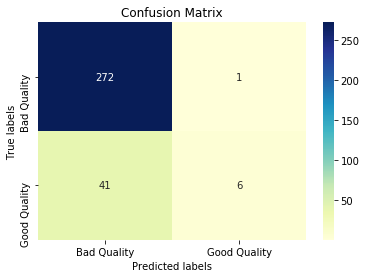

In [553]:
ax= plt.subplot()
sns.heatmap(cm_rfc, annot= True, fmt="g", cmap= "YlGnBu", ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['Bad Quality', 'Good Quality'])
ax.yaxis.set_ticklabels(['Bad Quality', 'Good Quality'])


### SVM Classifier

In [565]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

#### Model Performance

In [566]:
print(classification_report(y_test, pred_clf))

cm_clf = confusion_matrix(y_test, pred_clf)

print(cm_clf)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]


#### SVM Classifier with Hyper-parameter Tuning 

In [567]:
#from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

C:\Users\wiroo\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.867, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.867, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.868, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.867, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.867, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.868, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[CV] ......... C=1000, gamma=1, kernel=rbf, score=0.908, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.869, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.848, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.852, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.878, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.862, total=   0.1s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.873, total=   0.1s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    1.6s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [568]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [569]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

cm_clf = confusion_matrix(y_test, grid_predictions)

print(cm_clf)

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       273
           1       0.88      0.30      0.44        47

    accuracy                           0.89       320
   macro avg       0.88      0.65      0.69       320
weighted avg       0.89      0.89      0.87       320

[[271   2]
 [ 33  14]]


#### Accuracy Score

In [570]:
from sklearn.metrics import accuracy_score

cm1 = accuracy_score(y_test, pred_rfc) #random forest
cm2 = accuracy_score(y_test, pred_clf) #SVM
cm3 = accuracy_score(y_test, grid_predictions) #grid search


print(cm1)
print(cm2)
print(cm3)

# Grid searc SVM is the best model out of the three models.



0.86875
0.875
0.890625


#### Predict Bad or Good Wine with New data

In [571]:
Xnew = [[7.3, 0.58, 0.00, 2.0, 0.065, 15.0, 21.0, 0.9946, 3.36, 0.47, 10.0]]
# random data 

Xnew = sc.transform(Xnew) #standard scaler

ynew = rfc.predict(Xnew) #using random forest

ynew


# It is a Bad wine

array([0])